In [1]:
!python -m pip install --upgrade pip

     |████████████████████████████████| 1.6MB 15.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3 MB 16 kB/s 


In [3]:
!python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"

2021-05-10 04:10:23.549477: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-10 04:10:25.124934: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-10 04:10:25.125824: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-10 04:10:25.188636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-10 04:10:25.189289: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-10 04:10:25.189335: I tensorflow/stream_executor/platform/default/dso_loade

In [4]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/TENSORFLOW OBJECT DETECTION/ANPR')

In [5]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [7]:
paths = {
  'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
  'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
  'APIMODEL_PATH': os.path.join('Tensorflow','models'),
  'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
  'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
  'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
  'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
  'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
  'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
  'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
  'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
  'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [8]:
files = {
  'PIPELINE_CONFIG': os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
  'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
  'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [10]:
for path in paths.values():
  if not os.path.exists(path):
    !mkdir -p {path}

In [11]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
  !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 57046, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 57046 (delta 82), reused 146 (delta 59), pack-reused 56859
Receiving objects: 100% (57046/57046), 572.61 MiB | 18.69 MiB/s, done.
Resolving deltas: 100% (39401/39401), done.
Checking out files: 100% (2415/2415), done.


In [12]:
!apt-get install protobuf-compiler
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Processing /content/drive/My Drive/Colab Notebooks/TENSORFLOW OBJECT DETECTION/ANPR/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.6 MB 27.4 MB/s 
     |████████████████████████████████| 352 kB 70.4 MB/s 
     |████████

In [13]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
VERIFICATION_SCRIPT

'Tensorflow/models/research/object_detection/builders/model_builder_tf2_test.py'

In [14]:
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-05-10 04:18:58.211913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
2021-05-10 04:19:01.194412: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-10 04:19:01.195384: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-10 04:19:01.224607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-10 04:19:01.225201: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 d

In [25]:
!wget {PRETRAINED_MODEL_URL}
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-05-10 04:53:28--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.63.128, 2607:f8b0:4004:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.63.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  94.3MB/s    in 0.2s    

2021-05-10 04:53:28 (94.3 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-

In [15]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
  for label in labels:
    f.write('item { \n')
    f.write('\tname:\'{}\'\n'.format(label['name']))
    f.write('\tid:{}\n'.format(label['id']))
    f.write('}\n')

In [18]:
with open(files['LABELMAP'], 'r') as f:
  lines = f.readlines()

for line in lines:
  print(line, end = '')

item { 
	name:'licence'
	id:1
}


In [20]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
  !wget https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py
  !mv {'generate_tfrecord.py'} {files['TF_RECORD_SCRIPT']} 

--2021-05-10 04:33:05--  https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py
Resolving tensorflow-object-detection-api-tutorial.readthedocs.io (tensorflow-object-detection-api-tutorial.readthedocs.io)... 104.17.33.82, 104.17.32.82, 2606:4700::6811:2052, ...
Connecting to tensorflow-object-detection-api-tutorial.readthedocs.io (tensorflow-object-detection-api-tutorial.readthedocs.io)|104.17.33.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6231 (6.1K) [text/x-python]
Saving to: ‘generate_tfrecord.py’

generate_tfrecord.p 100%[===================>]   6.08K  --.-KB/s    in 0.001s  

2021-05-10 04:33:06 (5.38 MB/s) - ‘generate_tfrecord.py’ saved [6231/6231]



In [23]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


In [26]:
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [27]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [28]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [30]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], 'r') as f:
  proto_str = f.read()
  text_format.Merge(proto_str, pipeline_config)

In [31]:
pipeline_config

model {
  ssd {
    num_classes: 90
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0


In [32]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths["PRETRAINED_MODEL_PATH"], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'
pipeline_config.train_input_reader.label_map_path = files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [34]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], 'wb') as f:
  f.write(config_text)

In [36]:
print(config_text)

model {
  ssd {
    num_classes: 1
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 4e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.01
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.997
          scale: true
          epsilon: 0.001
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      arg

In [37]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
TRAINING_SCRIPT

'Tensorflow/models/research/object_detection/model_main_tf2.py'

In [42]:
command = 'python {} --model_dir={} --pipeline_config_path={} --num_train_steps=7000'.format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'])
command

'python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=7000'

In [43]:
!{command}

2021-05-10 05:15:16.986724: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-10 05:15:19.579249: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-10 05:15:19.580196: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-10 05:15:19.611701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-10 05:15:19.612449: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-10 05:15:19.612497: I tensorflow/stream_executor/platform/default/dso_loade

In [45]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
command

'python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet'

In [46]:
!{command}

2021-05-10 05:30:41.760187: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
W0510 05:30:44.611693 140558147925888 model_lib_v2.py:1064] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0510 05:30:44.611917 140558147925888 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0510 05:30:44.612009 140558147925888 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0510 05:30:44.612092 140558147925888 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0510 05:30:44.612205 140558147925888 model_lib_v2.py:1085] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-05-10 05:30:44.620295: I tensorflow/compiler/jit/xla

In [47]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [51]:
configs = config_util.get_configs_from_pipeline_file(files["PIPELINE_CONFIG"])
detection_model = model_builder.build(model_config = configs['model'], is_training = False)
ckpt = tf.compat.v2.train.Checkpoint(model = detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-8')).expect_partial()

@tf.function
def detect_fn(image):
  image, shapes = detection_model.preprocess(image)
  prediction_dict = detection_model.predict(image, shapes)
  detections = detection_model.postprocess(prediction_dict, shapes)
  return detections

In [59]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [53]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
category_index

{1: {'id': 1, 'name': 'licence'}}

In [80]:
def show_test_image_detections(IMAGE_PATH):
  img = cv2.imread(IMAGE_PATH)
  image_np = np.array(img)
  input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype = tf.float32)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
  detections['num_detections'] = num_detections

  #detection classes should be ints
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  label_id_offset = 1
  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'] + label_id_offset,
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates = True,
      max_boxes_to_draw = 5,
      min_score_thresh = 0.5,
      agnostic_mode = False
  )

  cv2_imshow(image_np_with_detections)

In [81]:
test_images_path = []
main_path = os.path.join(paths['IMAGE_PATH'], 'test')
for img in os.listdir(main_path):
  if img.endswith('png'):
    test_images_path.append(main_path + '/' + img)
  
test_images_path

['Tensorflow/workspace/images/test/Cars424.png',
 'Tensorflow/workspace/images/test/Cars417.png',
 'Tensorflow/workspace/images/test/Cars423.png',
 'Tensorflow/workspace/images/test/Cars419.png',
 'Tensorflow/workspace/images/test/Cars421.png',
 'Tensorflow/workspace/images/test/Cars422.png',
 'Tensorflow/workspace/images/test/Cars420.png',
 'Tensorflow/workspace/images/test/Cars418.png',
 'Tensorflow/workspace/images/test/Cars416.png',
 'Tensorflow/workspace/images/test/Cars415.png',
 'Tensorflow/workspace/images/test/Cars413.png',
 'Tensorflow/workspace/images/test/Cars414.png',
 'Tensorflow/workspace/images/test/Cars411.png',
 'Tensorflow/workspace/images/test/Cars412.png',
 'Tensorflow/workspace/images/test/Cars432.png',
 'Tensorflow/workspace/images/test/Cars431.png',
 'Tensorflow/workspace/images/test/Cars430.png',
 'Tensorflow/workspace/images/test/Cars428.png',
 'Tensorflow/workspace/images/test/Cars429.png',
 'Tensorflow/workspace/images/test/Cars427.png',
 'Tensorflow/workspa

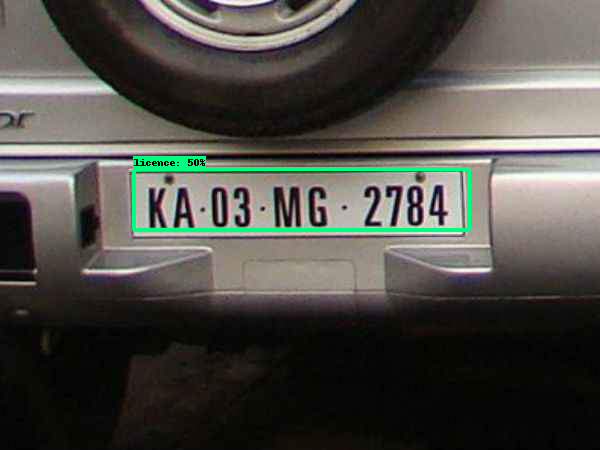

********************************************************************************************************************************************************************************************************


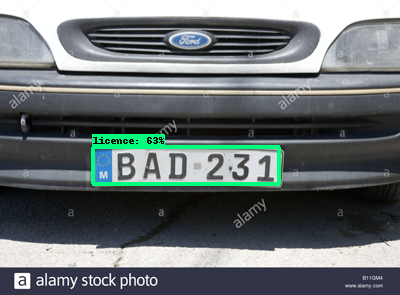

********************************************************************************************************************************************************************************************************


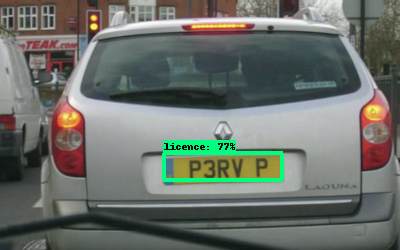

********************************************************************************************************************************************************************************************************


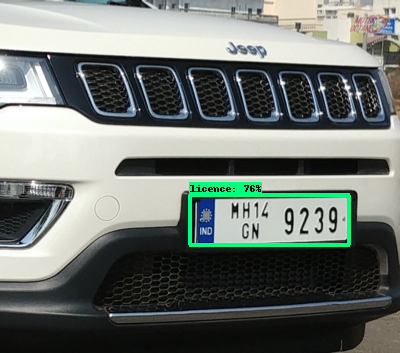

********************************************************************************************************************************************************************************************************


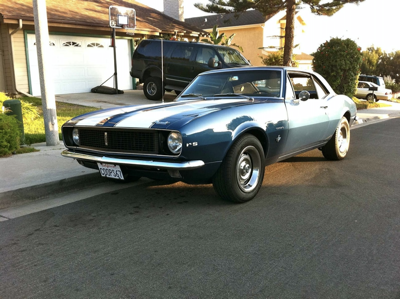

********************************************************************************************************************************************************************************************************


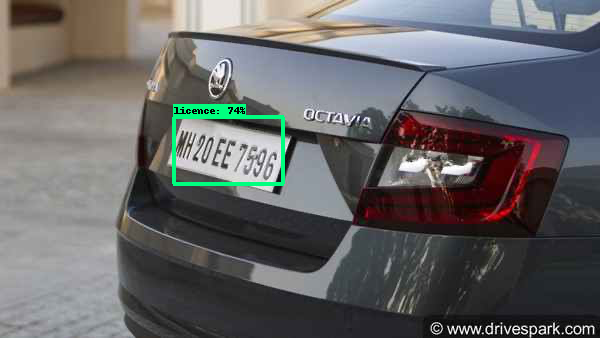

********************************************************************************************************************************************************************************************************


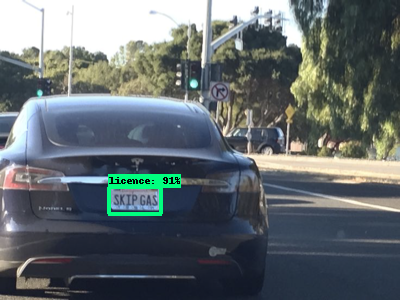

********************************************************************************************************************************************************************************************************


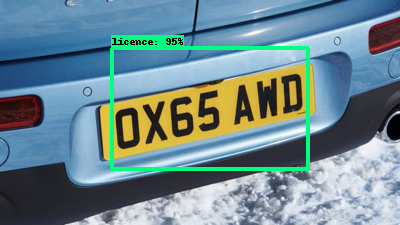

********************************************************************************************************************************************************************************************************


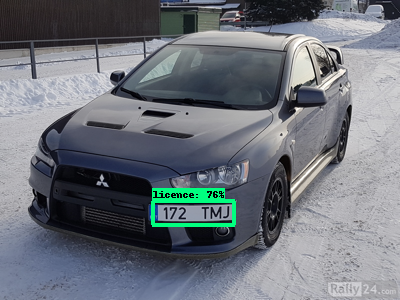

********************************************************************************************************************************************************************************************************


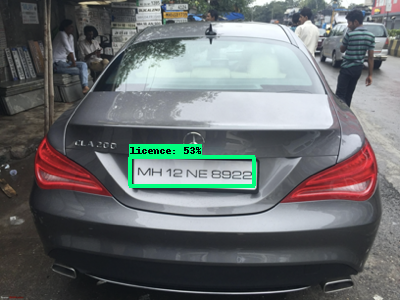

********************************************************************************************************************************************************************************************************


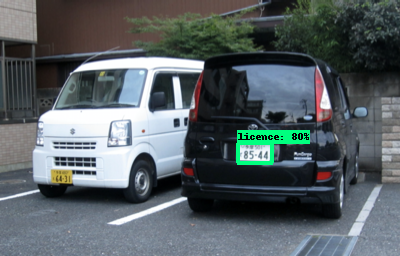

********************************************************************************************************************************************************************************************************


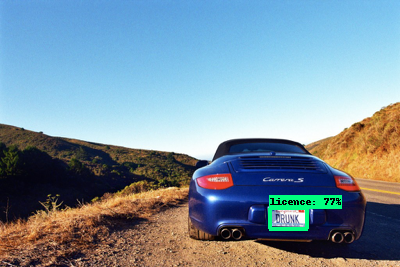

********************************************************************************************************************************************************************************************************


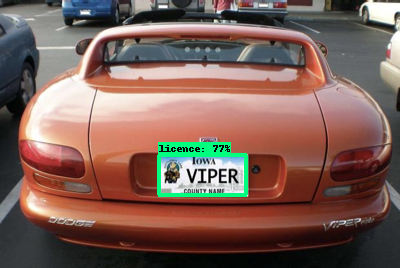

********************************************************************************************************************************************************************************************************


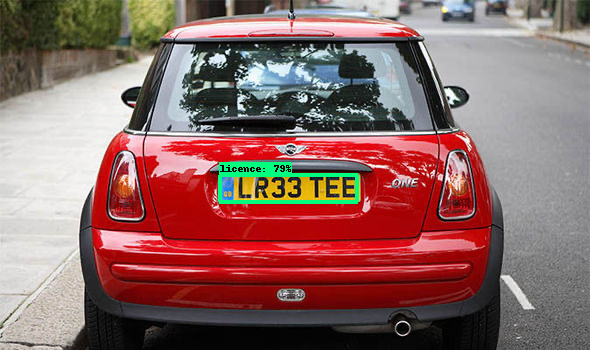

********************************************************************************************************************************************************************************************************


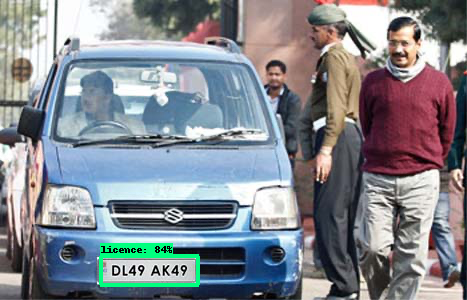

********************************************************************************************************************************************************************************************************


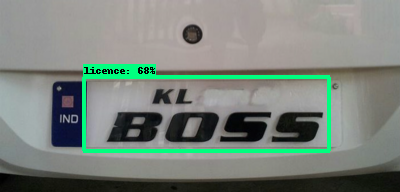

********************************************************************************************************************************************************************************************************


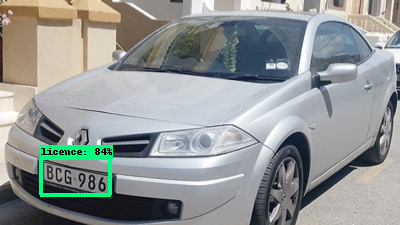

********************************************************************************************************************************************************************************************************


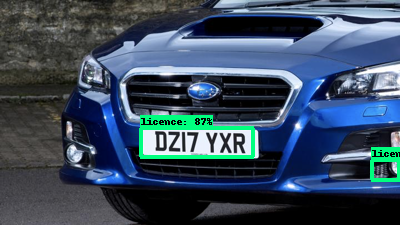

********************************************************************************************************************************************************************************************************


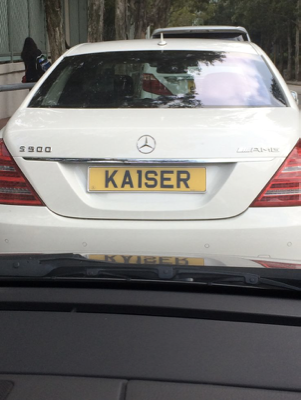

********************************************************************************************************************************************************************************************************


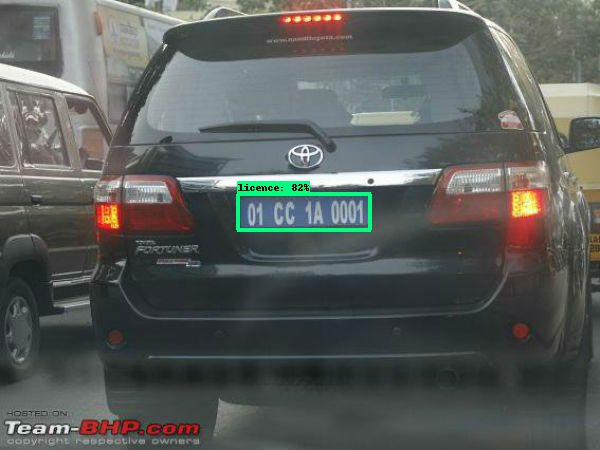

********************************************************************************************************************************************************************************************************


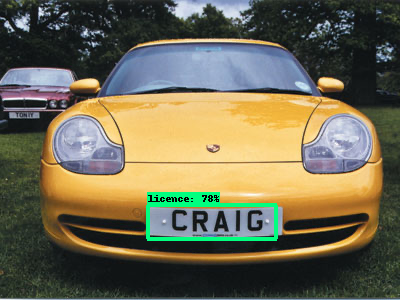

********************************************************************************************************************************************************************************************************


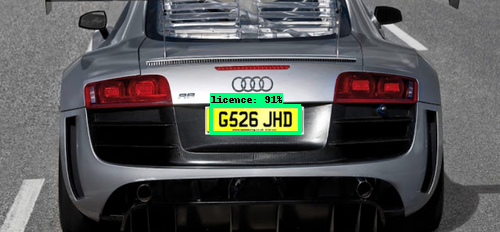

********************************************************************************************************************************************************************************************************


In [84]:
for img_path in test_images_path:
  show_test_image_detections(img_path)
  print('*' * 200)

In [86]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='captured_image.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to captured_image.jpg


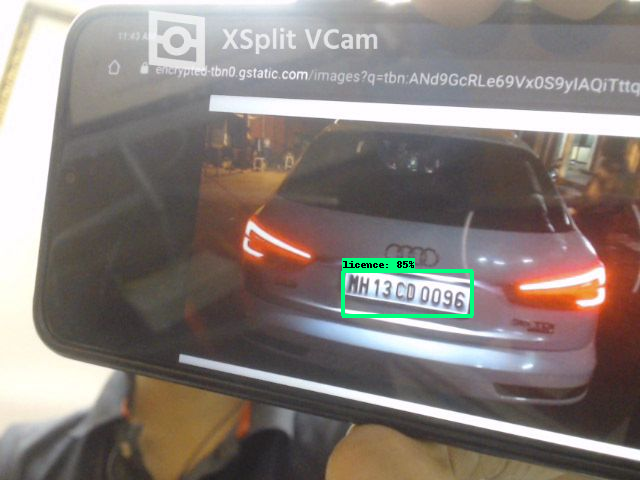

In [89]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  show_test_image_detections(filename)
except Exception as err:
  print(str(err))